In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
firstrow= session.query(measure).order_by(measure.date.desc()).first()
firstrow.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f940012feb0>,
 'station': 'USC00519397',
 'prcp': 0.0,
 'id': 2724,
 'tobs': 81.0,
 'date': '2017-08-23'}

The most recent data is from Aug 23 2017

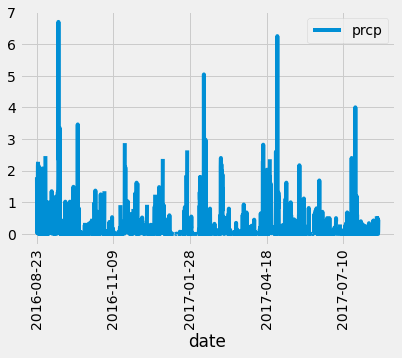

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = session.query(measure.date).filter(measure.date == '2016-08-23').all()


# Perform a query to retrieve the data and precipitation scores
rain = session.query(measure.date, measure.prcp).filter(measure.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain)
rain_df.set_index('date', inplace=True)

# Sort the dataframe by date
rain_df = rain_df.sort_values('date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(rot=90)
plt.show()




In [84]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [125]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(station.id).count()
print(f'There are {number_stations} stations')

There are 9 stations


In [116]:
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('station')
for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [117]:
cols = inspector.get_columns('measurement')
for col in cols:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [131]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(measure.station, measure.id).group_by(measure.station).order_by \
            (measure.id.desc()).all()
most_active

[('USC00516128', 16939),
 ('USC00511918', 14960),
 ('USC00519281', 12188),
 ('USC00519523', 9519),
 ('USC00518838', 9008),
 ('USC00517948', 7636),
 ('USC00514830', 5434),
 ('USC00513117', 2725),
 ('USC00519397', 1)]

In [233]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station = most_active[0][0]
top_station
station_name= session.query(station.station, station.name).all()
for row in station_name:
    if row[0] == top_station:
            print(f'The most active station is {row[0]} {row[1]}')
temperatures = session.query(measure.station, measure.tobs).filter(measure.station == top_station).all()
temps_list = []
for temp in temperatures:
    temps_list.append(temp[1])
tem = np.array(temps_list)
print(f'The lowest temperature in {top_station} during the last year was {tem.min()}')
print(f'The highest temperature in {top_station} during the last year was {tem.max()}')
print(f'The average temperature in {top_station} during the last year was {round(tem.mean(),2)}')
    

The most active station is USC00516128 MANOA LYON ARBO 785.2, HI US
The lowest temperature in USC00516128 during the last year was 58.0
The highest temperature in USC00516128 during the last year was 84.0
The average temperature in USC00516128 during the last year was 70.92


In [218]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
manoa = session.query(measure.date, measure.station, measure.tobs).filter(measure.station == 'USC00516128')\
        .filter(measure.date >= '2016-08-23').all()
manoa_df = pd.DataFrame(manoa)
#

In [219]:
manoa_df.set_index('date', inplace=True)

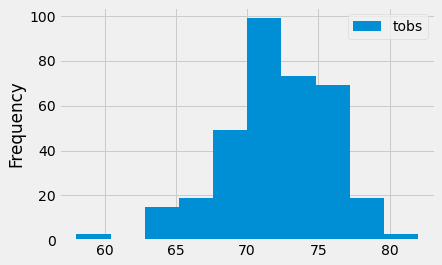

In [221]:
manoa_df.plot(kind='hist')
plt.show()

The most common range of temperature is between 70 and 80 degrees

# Close session

In [222]:
# Close Session
session.close()